In [26]:
import numpy as np       #importing libraries
import pandas as pd      
import statsmodels.api as sm      #importing statsmodels.api
import matplotlib.pyplot as plt   #importing matplotlib.pyplot 
from patsy import dmatrices   #importing patsy package
from sklearn.linear_model import LogisticRegression  #importing sklearn packages
from sklearn.model_selection import train_test_split  
from sklearn import metrics   
from sklearn.cross_validation import cross_val_score  
import seaborn as sns   #importing seaborn package

In [27]:
dta = sm.datasets.fair.load_pandas().data   #loading dataset
dta.head()    #displaying top 5 records

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


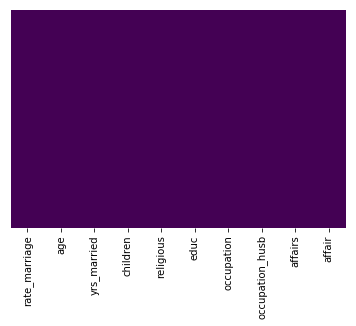

In [28]:
dta['affair'] = (dta.affairs > 0).astype(int)    #adding "affair" column:1 represents having affairs else 0
 #visualizing record with null values,hence no null values found
sns.heatmap(dta.isnull(),xticklabels='auto',yticklabels=False,cbar=False,cmap='viridis')  

In [29]:
#dividing dataframe into dependent & independent feature set
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',   #renaming column names & converting y into numpy array
'C(occupation)[T.3.0]':'occ_3',

'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)
#displaying top 5 records of independent features dataframe
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [30]:
#dividing data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logmodel = LogisticRegression()       #creating model instance 
logmodel.fit(X_train,y_train)     #Create an instance of Logistic Regression Classifier & fit data.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
predictions = logmodel.predict(X_test)      #predicting test results 
predictions    #predicted output set

array([1., 0., 0., ..., 1., 0., 1.])

In [32]:
from sklearn.metrics import confusion_matrix       #importing sklearn package
from sklearn.metrics import accuracy_score

In [33]:
accuracy=confusion_matrix(y_test,predictions)     #generating model confusion matrix
accuracy      #confusion matrix

array([[804,  81],
       [247, 142]], dtype=int64)

In [36]:
accuracy=accuracy_score(y_test,predictions)     #predicting accuracy of model
print("Accuracy of model is :" +str(accuracy))    #printing result

Accuracy of model is :0.7425431711145997
